## Linear Regression

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [10]:
#Function to calculate Mean Square Error
def lst_sq(predictions, target):
    return 0.5 * np.sum((predictions - target)**2)

#Function to calculate intwermwdiate weight using Stocastic Gradient Descent
def sgd_step(predictions, target, data, alpha=0.01):
    diff = predictions - target
    update = diff @ data
    w_new = w - alpha * update
    
    return w_new

In [11]:
#Load Iris Dataset
iris_dataset = datasets.load_iris()

x = iris_dataset.data
y = iris_dataset.target

batch_size = 32
itteration_count = 100

feature_names = iris_dataset.feature_names

#Define List of all possible pairs of input data
all_combinations = list(combinations(list(range(3, -1 , -1)), 2)) + list(combinations(list(range(4)),2))

#Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

#Split training data into batches (Each batch of size 32)
X_train_batch = [X_train[i: i + batch_size] for i in range(0, len(X_train), batch_size)]
y_train_batch = [y_train[j: j + batch_size] for j in range(0, len(y_train), batch_size)]

## Training the modals

Upon training, plot average error against each step of iterration

<IPython.core.display.Javascript object>


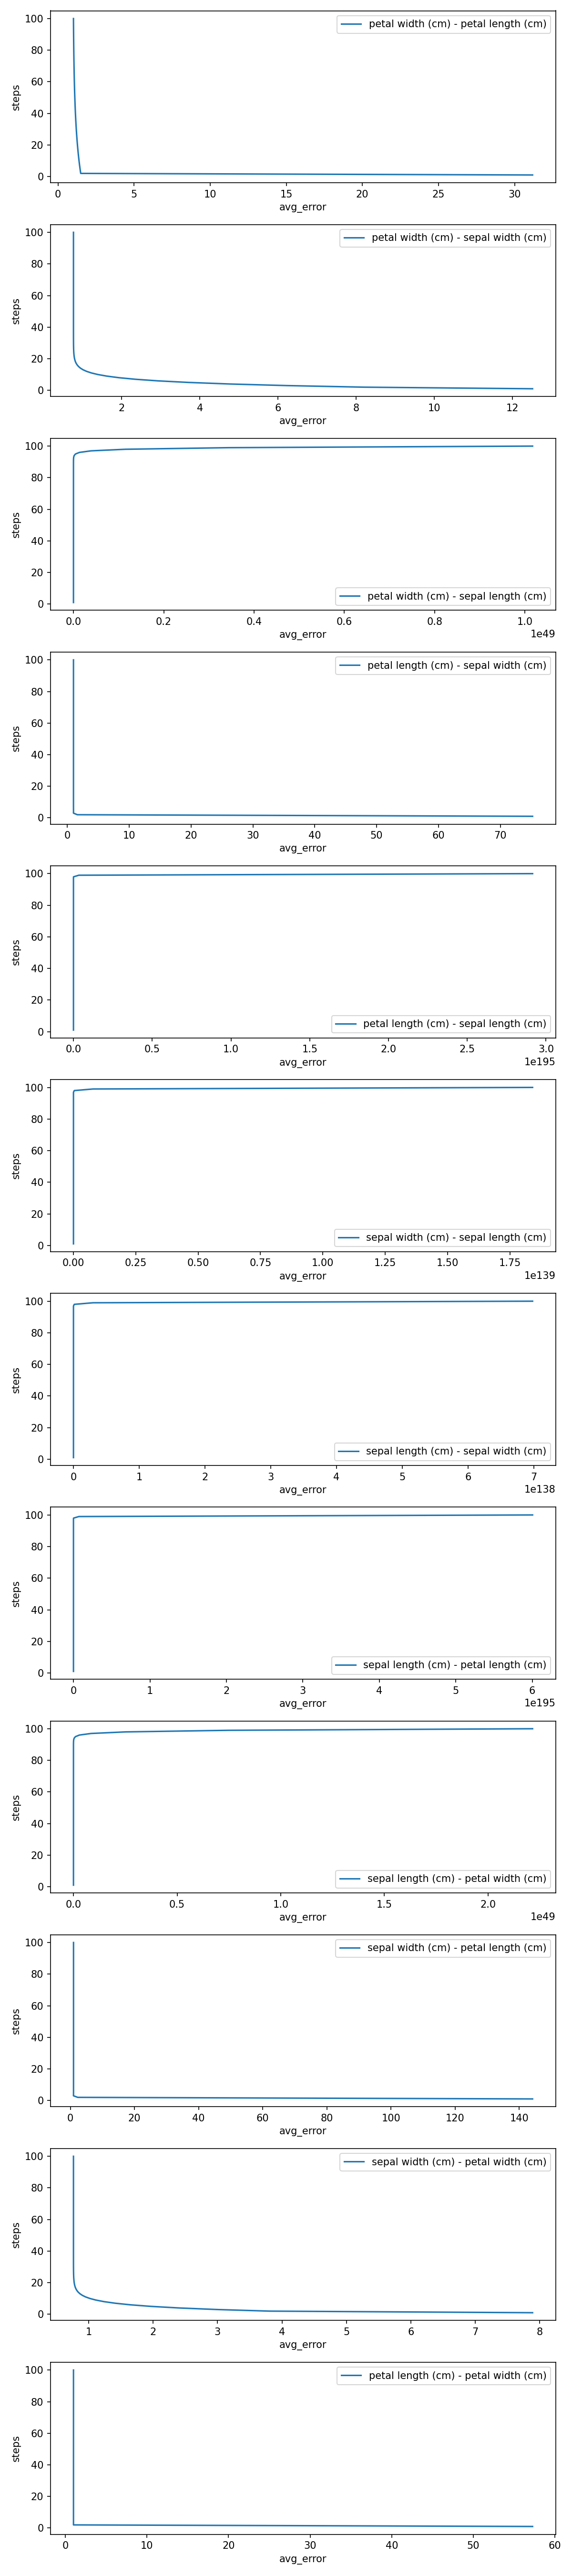

(3, 2)   petal width (cm)   petal length (cm)
(3, 1)   petal width (cm)   sepal width (cm)
(3, 0)   petal width (cm)   sepal length (cm)
(2, 1)   petal length (cm)   sepal width (cm)
(2, 0)   petal length (cm)   sepal length (cm)
(1, 0)   sepal width (cm)   sepal length (cm)
(0, 1)   sepal length (cm)   sepal width (cm)
(0, 2)   sepal length (cm)   petal length (cm)
(0, 3)   sepal length (cm)   petal width (cm)
(1, 2)   sepal width (cm)   petal length (cm)
(1, 3)   sepal width (cm)   petal width (cm)
(2, 3)   petal length (cm)   petal width (cm)


In [20]:
fig = plt.figure(figsize=[8, 36])
for i, tup in enumerate(all_combinations):
    #Use random weights [w0 , w1] for each modal
    w = np.random.uniform(-1, 1, 2)
    ax = fig.add_subplot(12,1, i+1)
    ax.set_xlabel('avg_error')
    ax.set_ylabel('steps')
    error_avg_list = []
    
    for n in range(itteration_count):
        
        error_sum = 0
        for batch_index in range(len(X_train_batch)):
            
            #Read each modal input and target data batch-wise
            batch_data = X_train_batch[batch_index][:, tup]
            batch_target = y_train_batch[batch_index]
            
            #Predicted target
            batch_y_hat = batch_data @ w
            
            #loss function using mean squar error
            batch_error = lst_sq(batch_y_hat, batch_target)
            error_sum += batch_error
            
            #Using stocastic gradient descent to get new value for weights
            w = sgd_step(batch_y_hat, batch_target, batch_data, alpha=0.002)
        
        error_avg = error_sum/len(X_train_batch)
        error_avg_list.append(error_avg)
    
    ax.plot(error_avg_list, np.linspace(1, 100, 100), label=feature_names[tup[0]] + ' - ' + feature_names[tup[1]])
    ax.legend(loc='best')
            
fig.tight_layout()
#fig.savefig('linear_regression_training_plot.png')

## L2 Reglarisation
Comparing regularized and non-regularised training on modal with input features petal width and petal length.

In [33]:
w_reg = w_non_reg = np.random.uniform(-1, 1, 2)
regularization = 1
custom_tup = (3,2)

non_reg_error_sum = 0
reg_error_sum = 0
for batch_index in range(len(X_train_batch)):
    batch_data = X_train_batch[batch_index][:, custom_tup]
    batch_target = y_train_batch[batch_index]
    reg_batch_y_hat = batch_data @ w_reg
    non_reg_batch_y_hat = batch_data @ w_non_reg
    
    #loss function using mean squar error
    reg_error = lst_sq(reg_batch_y_hat, batch_target)
    non_reg_error = lst_sq(non_reg_batch_y_hat, batch_target)

    reg_error_sum += reg_error
    non_reg_error_sum += non_reg_error
    
    w_reg = np.linalg.inv(regularization * np.eye(batch_data.shape[1]) + batch_data.T @ batch_data) @ (batch_data.T @ batch_target)
    w_non_reg = np.linalg.inv(batch_data.T @ batch_data) @ (batch_data.T @ batch_target)
        
reg_error_avg = reg_error_sum/len(X_train_batch)
non_reg_error_avg = non_reg_error_sum/len(X_train_batch)

print('Regularised weight : {} and error : {}'.format(w_reg, reg_error_avg))
print('Non-Regularised weight : {} and error : {}'.format(w_non_reg, non_reg_error_avg))

Regularised weight : [0.30579089 0.20654623] and error : 52.2944018131044
Non-Regularised weight : [ 1.57130013 -0.171432  ] and error : 52.128910010972746


In [ ]:
# regularization = 1
# custom_tup = (2,3)
# input_data = X_train[:, custom_tup]
# w_non_reg = np.linalg.inv(input_data.T @ input_data) @ (input_data.T @ y_train)
# w_reg = np.linalg.inv(regularization * np.eye(input_data.shape[1]) + input_data.T @ input_data) @ (input_data.T @ y_train)

# reg_y_hat = input_data @ w_reg
# non_reg_y_hat = input_data @ w_non_reg

# reg_error = lst_sq(reg_y_hat, y_train)
# non_reg_error = lst_sq(non_reg_y_hat, y_train)

# print('Non-regularised weight : {} and error : {}'.format(w_non_reg, non_reg_error))
# print('Regularised weight : {} and error : {}'.format(w_reg, reg_error))

# fig = plt.figure(figsize=[8, 36])
# ax = fig.add_subplot(2,1, i+1)
# ax.set_xlabel('avg_error')
# ax.set_ylabel('steps')

# ax.plot(error_avg_list, np.linspace(1, 100, 100), label=feature_names[tup[0]] + ' - ' + feature_names[tup[1]])
#     ax.legend(loc='best')
            
# fig.tight_layout()
#fig.savefig('linear_regression_training_plot.png')